#  What is Jupyter Notebook?

La plupart des exercices seront exécutés sur un Jupyter Notebook. Il s'agit d'un outil incroyablement puissant pour développer et présenter de manière interactive des projets de science des données. Dans les premières minutes, nous allons vous expliquer comment utiliser les Jupyter Notebooks pour les projets de science des données et la visualisation des données.

Tout d'abord, qu'est-ce qu'un "notebook" ?

Un notebook intègre le code et ses résultats dans un document unique qui combine des visualisations, du texte narratif, des équations mathématiques etc. etc. En d'autres termes, il s'agit d'un document unique dans lequel vous pouvez exécuter du code, afficher la sortie, mais aussi ajouter des explications, des formules, des graphiques, et rendre votre travail plus transparent, compréhensible, reproductible et partageable.

Les Jupyter Notebook ont généralement l'extension .ipynb, et vous pouvez les exécuter directement dans votre navigateur.

Si vous êtes intéressé, vous pouvez en savoir plus sur Jupyter-notebook ici : https://www.dataquest.io/blog/jupyter-notebook-tutorial/


## Jupyter Notebook Cells
Les cellules forment le corps d'un Jupyter Notebook. Il existe deux principaux types de cellules :

- Une **cellule Markdown** contient du texte formaté à l'aide de Markdown (comme celle que vous lisez en ce moment)
- Une **cellule de code** contient du code à exécuter. Pour exécuter le code dans une cellule, il suffit d'exécuter Crtl+Enter.

Nous allons commencer par un exemple simple (générer un nombre aléatoire et tracer la distribution) pour nous assurer que vous pouvez charger les python libraries et comprendre les principes du notebook Jupyter. 

Let's get started!

In [30]:
#exécuter le code de la cellule avec Crtl+Enter.

# Nous devons d'abord importer les  python libraries
import numpy as np
import plotly.express as px
#(on utilise plotly library pour rendre les plots interactif)
from IPython.display import HTML


print("Successfully loaded the python libraries!")

#generate a list of  10000 random numbers 
x = np.random.randn(10000)
# and plot them         
fig = px.histogram(x)
fig.show()

Successfully loaded the python libraries!


**Question 1)**  Quelle est la moyenne des données que vous venez de générer (créez une nouvelle cellule code et utilisez  x.mean()) ? Pouvez-vous comprendre quelle est leur distribution ? 

# Exploring TCGA

Ok ! Nous pouvons maintenant commencer le vrai tutoriel, l'objectif d'aujourd'hui est de se familiariser avec le site web TCGA. Vous pouvez trouver ici une courte explication https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga, et ici le jeu de données public https://portal.gdc.cancer.gov/.

Aujourd'hui, nous allons utiliser TCGA pour comparer les taux de survie dans différents types de cancer et analyser les données cliniques des patients.

**Question 2)** On commence avec quelques analyses sur des données de mélanome. Cliquez sur "Skin" dans le panneau de droite, et sélectionnez "TCGA". Combien de cas sont disponibles? 

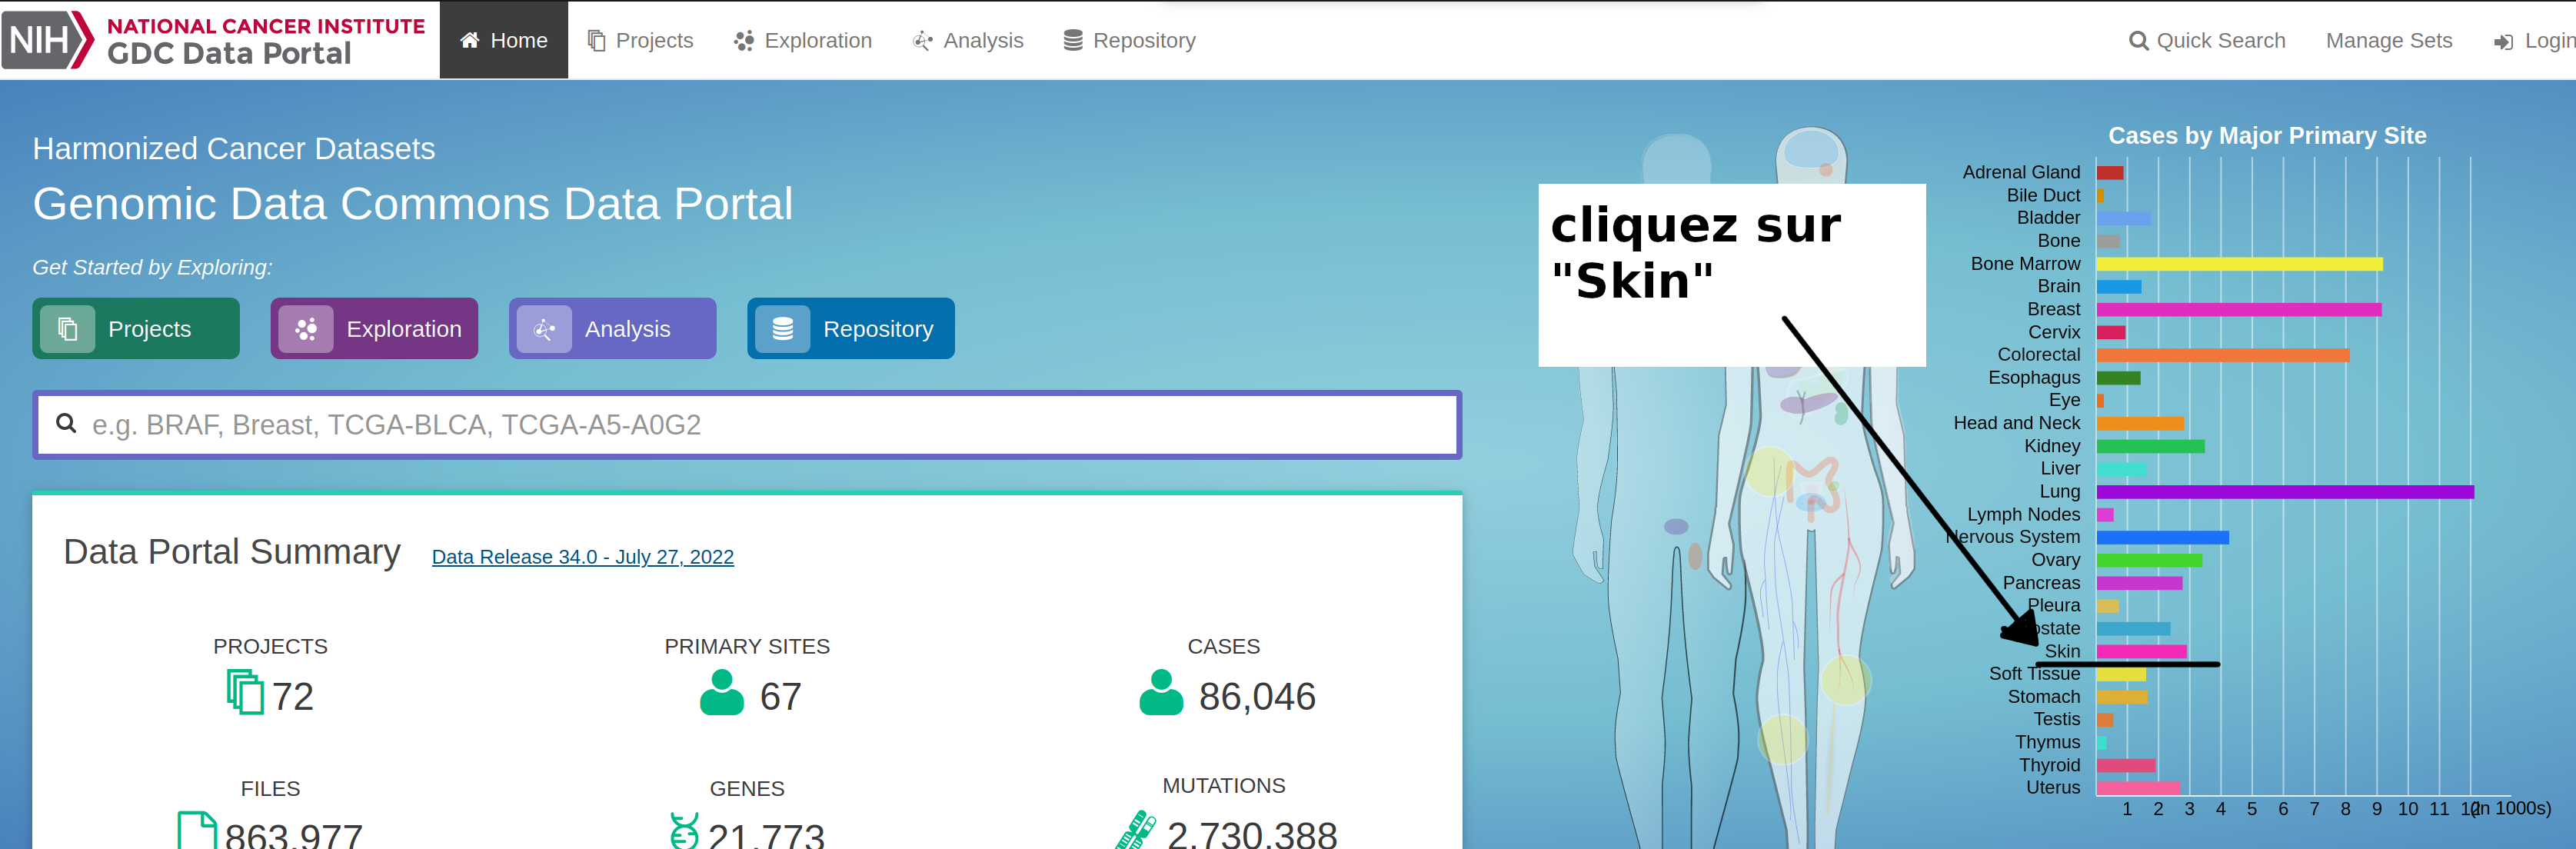

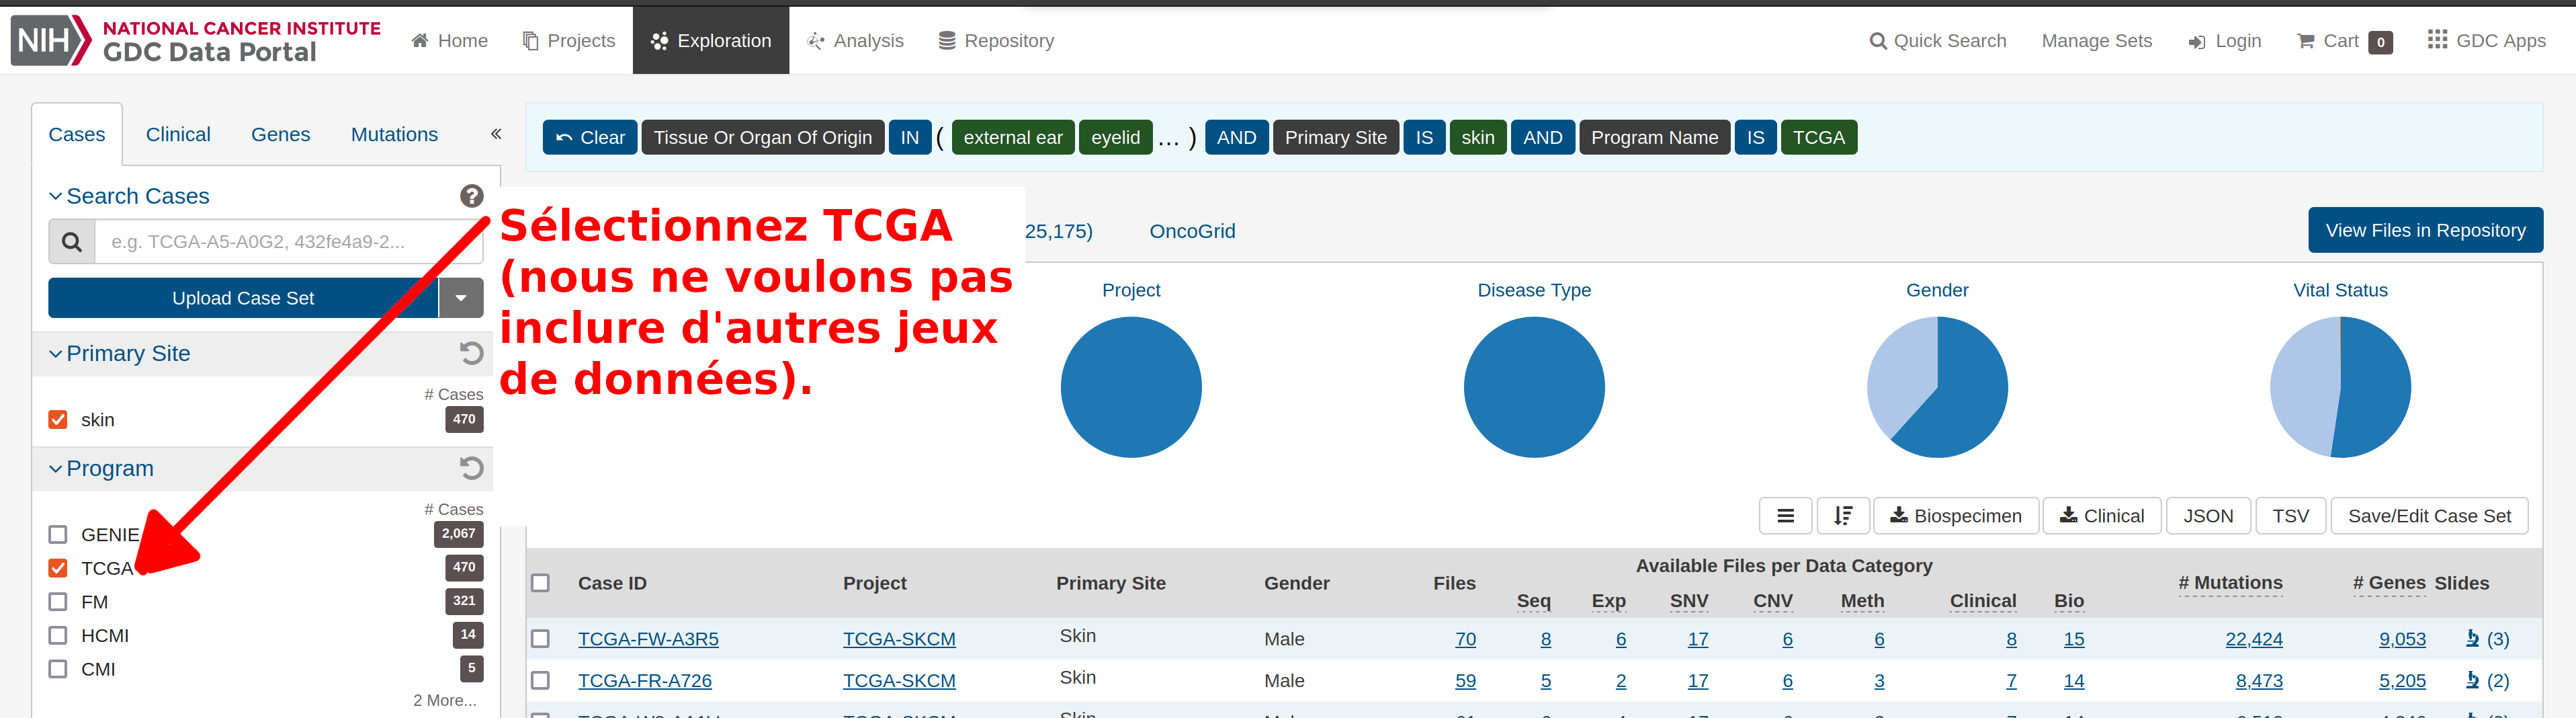

**Question 3)** Cliquez sur "Genes" pour obtenir des informations sur les gènes mutés dans le mélanome. Quels sont les gènes les plus mutés ? Pouvez-vous interpréter le graph "overall survival plot"?

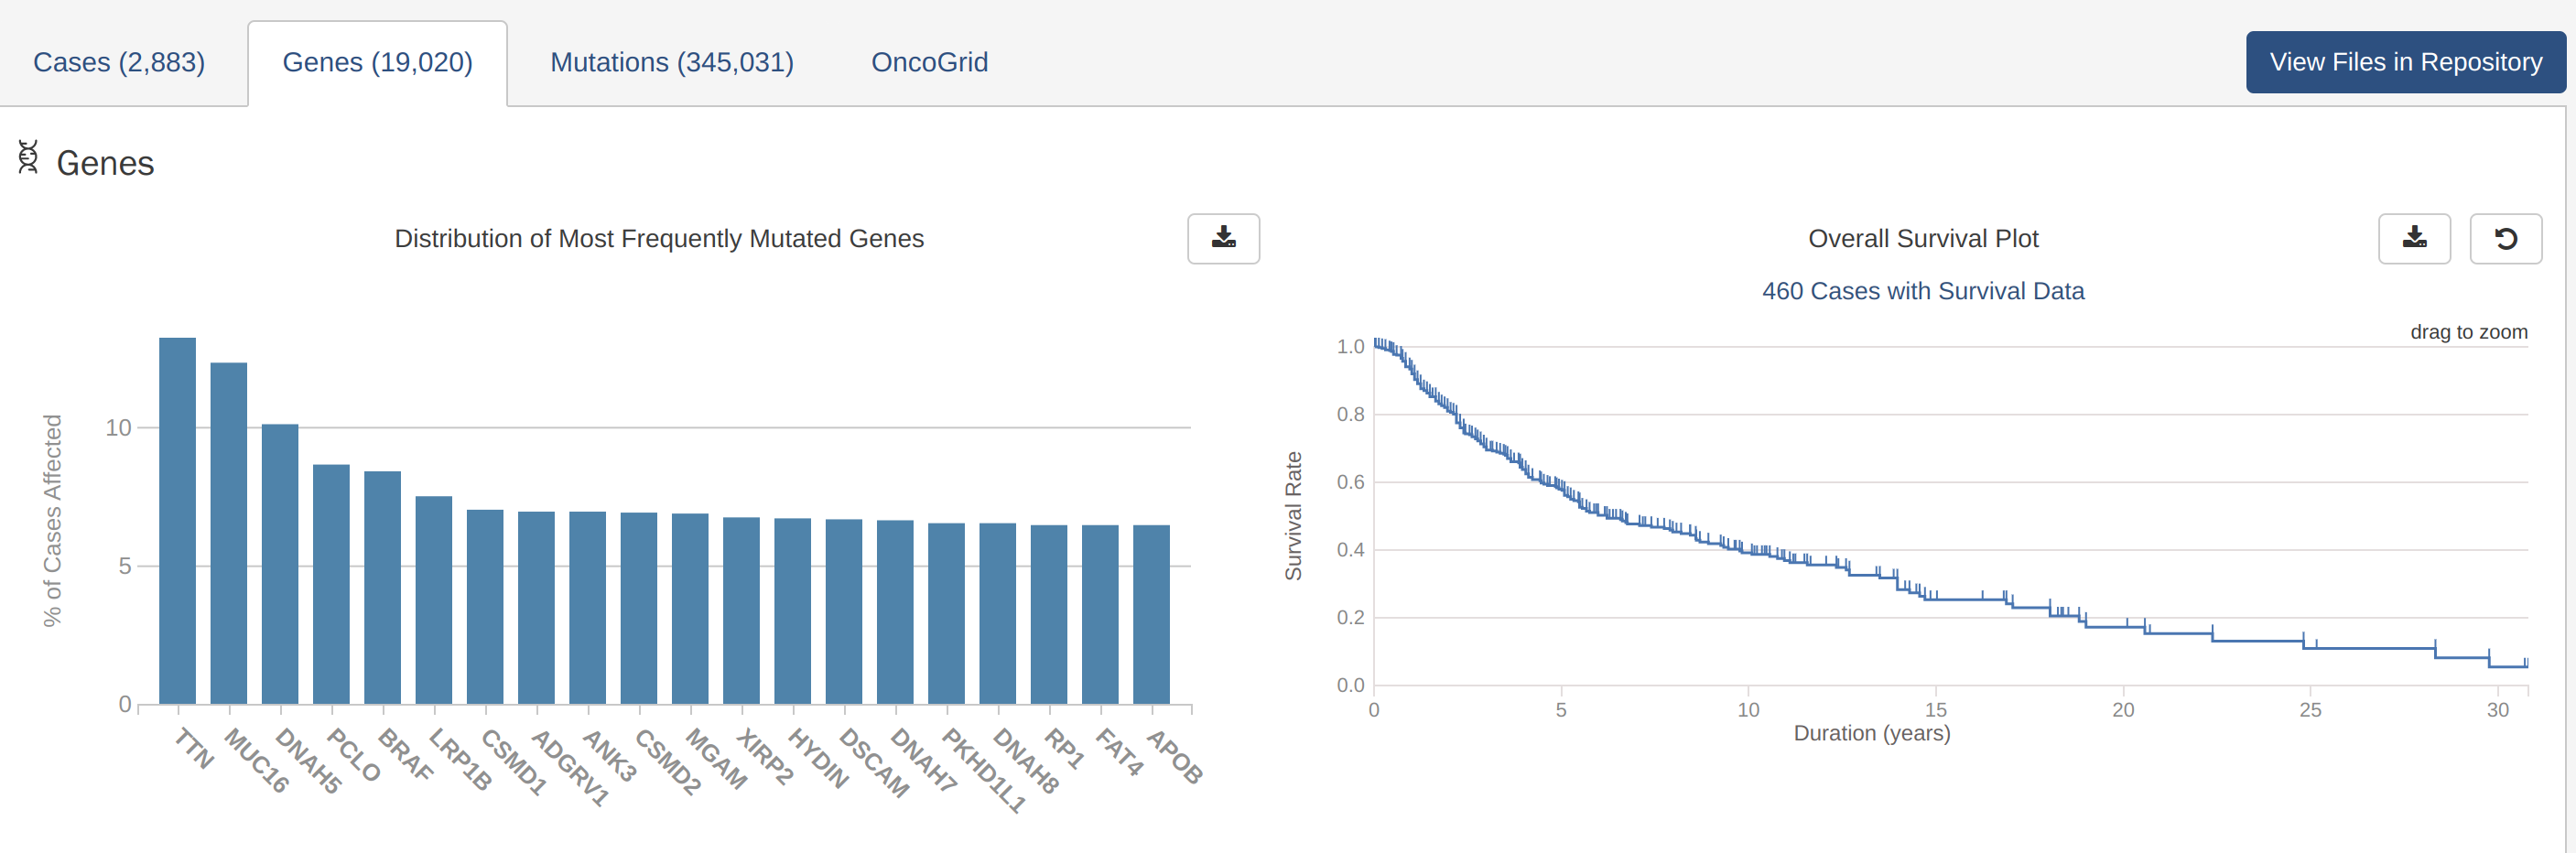

**Question 4)** Répétez la même analyse pour le cancer du poumon, le glioblastome et le cancer du sein. 

**Question 5)** Identifiez les gènes qui sont mutés dans plusieurs types de tumeurs, décrivez brièvement leurs fonctions (wikipedia peut être très utile) et interprétez vos résultats.
Comparez les "overall survival plot" à 5, 10, 15 ans dans les trois cas. Que concluez-vous ? (Les "overall survival plot" seront expliqués plus en détail plus en détail dans les prochains cours)

## Clinical data
Nous allons maintenant examiner des données cliniques des patients. 

Nous avons téléchargé pour vous le fichier des données cliniques des patients atteints de mélanome à partir de TCGA, fichier "TCGA-SKCM.GDC_phenotype.tsv".

Vous pouvez également consulter cette page https://xenabrowser.net/datapages/?dataset=TCGA-SKCM.GDC_phenotype.tsv&host=https%3A%2F%2Fgdc.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443 qui donne quelques informations supplémentaires sur ce fichier.

**Question 6)** Ouvrez un nouvel page (ne fermez pas ce jupyter-notebook!), retournez à l'accueil et cliquez sur le fichier pour l'ouvrir avec un text editor. Arrivez-vous à comprendre quelles informations il contient ?

Comme vous l'avez compris, extraire des informations utiles d'un fichier texte aussi volumineux est un défi. Nous avons besoin d'un script pour les analyser et les étudier. Nous utiliserons les libraries python *panda* pour l'analyse des données.

In [35]:
# read the annotations filne
import pandas as pd

df = pd.read_csv("./TCGA-SKCM.GDC_phenotype.tsv", sep = '\t')
print(df)

# bonus technical question. Pourquoi on utilise sep = '\t'? 

    submitter_id.samples  age_at_initial_pathologic_diagnosis batch_number  \
0       TCGA-D9-A4Z2-01A                                 50.0     262.74.0   
1       TCGA-ER-A2NH-06A                                 49.0     180.87.0   
2       TCGA-BF-A5EO-01A                                 65.0     291.69.0   
3       TCGA-D9-A6EA-06A                                 70.0     316.66.0   
4       TCGA-D9-A4Z3-01A                                 73.0     277.76.0   
..                   ...                                  ...          ...   
472     TCGA-D3-A1Q9-06A                                 72.0     180.87.0   
473     TCGA-FS-A1ZP-06A                                 52.0     180.87.0   
474     TCGA-EB-A42Y-01A                                 73.0     262.74.0   
475     TCGA-WE-A8ZY-06A                                 62.0     388.48.0   
476     TCGA-EE-A20C-06A                                 59.0     180.87.0   

                                bcr bcr_followup_barcode  \
0  

In [36]:
#Il y a trop de colonnes et de lignes... difficile à comprendre. Une astuce simple consiste à regarder les colonnes
print(df.columns.to_list())

['submitter_id.samples', 'age_at_initial_pathologic_diagnosis', 'batch_number', 'bcr', 'bcr_followup_barcode', 'bcr_followup_uuid', 'submitter_id', 'breslow_depth_value', 'day_of_dcc_upload', 'day_of_form_completion', 'days_to_initial_pathologic_diagnosis', 'days_to_submitted_specimen_dx', 'distant_metastasis_anatomic_site', 'file_uuid', 'followup_case_report_form_submission_reason', 'history_of_neoadjuvant_treatment', 'informed_consent_verified', 'interferon_90_day_prior_excision_admin_indicator', 'lactate_dehydrogenase_result', 'lost_follow_up', 'malignant_neoplasm_mitotic_count_rate', 'melanoma_clark_level_value', 'melanoma_origin_skin_anatomic_site', 'melanoma_ulceration_indicator', 'month_of_dcc_upload', 'month_of_form_completion', 'new_tumor_dx_prior_submitted_specimen_dx', 'other_dx', 'pathologic_M', 'pathologic_N', 'pathologic_T', 'patient_id', 'person_neoplasm_cancer_status', 'postoperative_rx_tx', 'primary_melanoma_at_diagnosis_count', 'primary_neoplasm_melanoma_dx', 'primary

In [37]:
# Examinons quelques statistiques simples  
# Par exemple, on peut afficher la distribution du genre des patients avec un camembert
fig = px.pie(df,names = "gender.demographic", title='gender')
fig.show()

# si vous souhaitez obtenir le nombre de cas, vous pouvez utiliser la fonction value_counts()
print(df['gender.demographic'].value_counts())

male      296
female    181
Name: gender.demographic, dtype: int64


**Question 7)** De la même manière que nous venons de le faire, pouvez-vous afficher les différents types d'echantillon (column 'sample_type.samples') avec un camambert et visualisez le nombre de cas?

In [39]:
# Une autre façon de procéder est d'utiliser un diagramme à barres, 
# et nous pouvons même utiliser des couleurs différentes pour les hommes et les femmes. 

fig = px.bar(df, y='sample_type.samples', color='gender.demographic', title="sample_type")
fig.show()

**Question 8)**  Répéter la même analyse  (camabert + barplot) mais en étudiant la localisation de la tumeur (columns = 'site_of_resection_or_biopsy.diagnoses')

## Age of diagnosis 

Nous allons maintenant tracer la distribution de l'âge lorsque la pathologie a été diagnostiquée pour la première fois (voir la colonne "age_at_initial_pathologic_diagnosis")

In [41]:
fig = px.histogram(df, x="age_at_initial_pathologic_diagnosis", barmode = "overlay")
fig.show()

**Question 9)** Quelle est la moyenne ? Décrire la distribution.

**Question 10)**  Répéter la même analyse mais en utilisant deux couleurs différentes pour les hommes et les femmes.

Avant de terminer, nous vous demandons de télécharger le fichier que nous utiliserons dans le prochain tutoriel.

1. Accédez au site Web du TCGA (https://portal.gdc.cancer.gov/) et recherchez les données du patient TCGA-D9-A1JX. Cliquez sur "Files"en haut à droite. De nombreuses données sont disponibles pour ces patients. Expliquez-les brièvement.
2. Cherchez et téléchargez le fichier 04aa322d-117d-4b83-8b26-ad0b04299275.wxs.aliquot_ensemble_masked.maf.gz (direct link https://portal.gdc.cancer.gov/files/97cf696c-5633-4fbd-9ed8-680599947dcc). 
3. Decompressez-le. Ouvrez le dossier et, encore une fois, decompressez le fichier 04aa322d-117d-4b83-8b26-ad0b04299275.wxs.aliquot_ensemble_masked.maf.gz.
4. Placez le fichier 04aa322d-117d-4b83-8b26-ad0b04299275.wxs.aliquot_ensemble_masked.maf dans 'week2' de la page Jupyter.

Les fichiers *.maf* (Mutation Annotation Format) sont des fichiers qui contiennent des annotations de mutations somatiques et/ou germinales. Pour des raisons de confidentialité, les fichiers *.maf* contenant des annotations de mutations germinales sont protégés et distribués en accès contrôlé. Les fichiers *.maf* contenant uniquement des mutations somatiques sont accessibles au public.

La semaine prochaine, nous utiliserons Python pour analyser ce fichier et effectuer une analyse statistique.

**Félicitations, vous avez terminé ce tutoriel avec succès !**